## S&P 500 Time Clustering (2013-2018)##

#### General Steps:

Group S&P return data (% price return too?) by months over all 5 years. Use the describe function to get basic stats on all months (over the 5 years). Plot all 12 month’s avg PR or TR and see what months cluster together. Run KNN. Do this for % PR and TR too. Normalization may be needed. By looking at what months are closer together over the 5 years it may show signs of very general trends…like Aug & Dec being slow (aka low returns)..we can also do this for companies too using volumes!

Group S&P return data by month (all Jan’s together, all Feb’s together) and split the data up into years (all jan 2013 groups together, all Feb 2013 grouped together, etc). Get basic stats (.describe) for all months in their year (1 chart for 01/2013, 1 chart for 02/2013, etc). Plot all months’ avgs of a given data feature (TR, PR, % PR). How do they group together? Are all Feb’s together? All Jan’s together? Are dec and Jan very close? Run KNN. Normalization may be needed.

If we find all Feb’s group together (aka make a cluster) if we introduce a new point can we identify what month it’s from by getting it’s cluster

In [515]:
#Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [516]:
pr = pd.read_csv("/Users/andriana/Capstone_Data/sp_500_price_return_1.csv", parse_dates=['Effective date '])

In [517]:
pr.set_index('Effective date ')
pr.head()

,Effective date,S&P 500 (TR),S&P 500 (Net TR),S&P 500
0,2013-04-10,2804.81,2589.71,1587.73
1,2013-04-11,2815.02,2599.07,1593.37
2,2013-04-12,2807.10,2591.74,1588.85
3,2013-04-15,2742.63,2532.21,1552.36
4,2013-04-16,2781.86,2568.43,1574.57


#### Section 1 Goal: Group all Months together

In [518]:
pr.rename(columns = {'Effective date ':'date'},inplace=True)

In [519]:
pr = pr.set_index('date')

In [520]:
#Make dataframes for all months of 2014
jan14 = pr['2014-01']
feb14 = pr['2014-02']
mar14 = pr['2014-03']
apr14 = pr['2014-04']
may14 = pr['2014-05']
jun14 = pr['2014-06']
jul14 = pr['2014-07']
aug14 = pr['2014-08']
sep14 = pr['2014-09']
oct14 = pr['2014-10']
nov14 = pr['2014-11']
dec14 = pr['2014-12']

In [521]:
jan14_2 = jan14.describe().round(2)
feb14_2 = feb14.describe().round(2)
mar14_2 = mar14.describe().round(2)
apr14_2 = apr14.describe().round(2)
may14_2 = may14.describe().round(2)
jun14_2 = jun14.describe().round(2)
jul14_2 = jul14.describe().round(2)
aug14_2 = aug14.describe().round(2)
sep14_2 = sep14.describe().round(2)
oct14_2 = oct14.describe().round(2)
nov14_2 = nov14.describe().round(2)
dec14_2 = dec14.describe().round(2)

In [522]:
d14 = [jan14_2.loc['mean','S&P 500'].round(1),feb14_2.loc['mean','S&P 500'].round(1),
      mar14_2.loc['mean','S&P 500'].round(1),apr14_2.loc['mean','S&P 500'].round(1),
      may14_2.loc['mean','S&P 500'].round(1),jun14_2.loc['mean','S&P 500'].round(1),
      jul14_2.loc['mean','S&P 500'].round(1),aug14_2.loc['mean','S&P 500'].round(1),
      sep14_2.loc['mean','S&P 500'].round(1),oct14_2.loc['mean','S&P 500'].round(1),
      nov14_2.loc['mean','S&P 500'].round(1),dec14_2.loc['mean','S&P 500'].round(1)]

In [523]:
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

Text(0.5,1,'Price Return of S&P 500 (2014)')

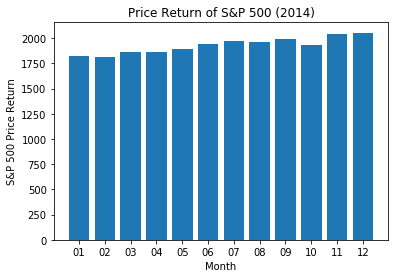

In [524]:
plt.bar(months,d14)
plt.xlabel('Month')
plt.ylabel('S&P 500 Price Return')
plt.title('Price Return of S&P 500 (2014)')

In [525]:
#Make dataframes for all months of 2015
jan15 = pr['2015-01']
feb15 = pr['2015-02']
mar15 = pr['2015-03']
apr15 = pr['2015-04']
may15 = pr['2015-05']
jun15 = pr['2015-06']
jul15 = pr['2015-07']
aug15 = pr['2015-08']
sep15 = pr['2015-09']
oct15 = pr['2015-10']
nov15 = pr['2015-11']
dec15 = pr['2015-12']

In [526]:
jan15_2 = jan15.describe().round(2)
feb15_2 = feb15.describe().round(2)
mar15_2 = mar15.describe().round(2)
apr15_2 = apr15.describe().round(2)
may15_2 = may15.describe().round(2)
jun15_2 = jun15.describe().round(2)
jul15_2 = jul15.describe().round(2)
aug15_2 = aug15.describe().round(2)
sep15_2 = sep15.describe().round(2)
oct15_2 = oct15.describe().round(2)
nov15_2 = nov15.describe().round(2)
dec15_2 = dec15.describe().round(2)

In [527]:
d15 = [jan15_2.loc['mean','S&P 500'].round(1),feb15_2.loc['mean','S&P 500'].round(1),
      mar15_2.loc['mean','S&P 500'].round(1),apr15_2.loc['mean','S&P 500'].round(1),
      may15_2.loc['mean','S&P 500'].round(1),jun15_2.loc['mean','S&P 500'].round(1),
      jul15_2.loc['mean','S&P 500'].round(1),aug15_2.loc['mean','S&P 500'].round(1),
      sep15_2.loc['mean','S&P 500'].round(1),oct15_2.loc['mean','S&P 500'].round(1),
      nov15_2.loc['mean','S&P 500'].round(1),dec15_2.loc['mean','S&P 500'].round(1)]

In [528]:
#Make dataframes for all months of 2016
jan16 = pr['2016-01']
feb16 = pr['2016-02']
mar16 = pr['2016-03']
apr16 = pr['2016-04']
may16 = pr['2016-05']
jun16 = pr['2016-06']
jul16 = pr['2016-07']
aug16 = pr['2016-08']
sep16 = pr['2016-09']
oct16 = pr['2016-10']
nov16 = pr['2016-11']
dec16 = pr['2016-12']
#use Describe
jan16_2 = jan16.describe().round(2)
feb16_2 = feb16.describe().round(2)
mar16_2 = mar16.describe().round(2)
apr16_2 = apr16.describe().round(2)
may16_2 = may16.describe().round(2)
jun16_2 = jun16.describe().round(2)
jul16_2 = jul16.describe().round(2)
aug16_2 = aug16.describe().round(2)
sep16_2 = sep16.describe().round(2)
oct16_2 = oct16.describe().round(2)
nov16_2 = nov16.describe().round(2)
dec16_2 = dec16.describe().round(2)
#Collect data
d16 = [jan16_2.loc['mean','S&P 500'].round(1),feb16_2.loc['mean','S&P 500'].round(1),
      mar16_2.loc['mean','S&P 500'].round(1),apr16_2.loc['mean','S&P 500'].round(1),
      may16_2.loc['mean','S&P 500'].round(1),jun16_2.loc['mean','S&P 500'].round(1),
      jul16_2.loc['mean','S&P 500'].round(1),aug16_2.loc['mean','S&P 500'].round(1),
      sep16_2.loc['mean','S&P 500'].round(1),oct16_2.loc['mean','S&P 500'].round(1),
      nov16_2.loc['mean','S&P 500'].round(1),dec16_2.loc['mean','S&P 500'].round(1)]

In [529]:
#Make dataframes for all months of 2016
jan17 = pr['2017-01']
feb17 = pr['2017-02']
mar17 = pr['2017-03']
apr17 = pr['2017-04']
may17 = pr['2017-05']
jun17 = pr['2017-06']
jul17 = pr['2017-07']
aug17 = pr['2017-08']
sep17 = pr['2017-09']
oct17 = pr['2017-10']
nov17 = pr['2017-11']
dec17 = pr['2017-12']
#use Describe
jan17_2 = jan17.describe().round(2)
feb17_2 = feb17.describe().round(2)
mar17_2 = mar17.describe().round(2)
apr17_2 = apr17.describe().round(2)
may17_2 = may17.describe().round(2)
jun17_2 = jun17.describe().round(2)
jul17_2 = jul17.describe().round(2)
aug17_2 = aug17.describe().round(2)
sep17_2 = sep17.describe().round(2)
oct17_2 = oct17.describe().round(2)
nov17_2 = nov17.describe().round(2)
dec17_2 = dec17.describe().round(2)
#Collect data
d17 = [jan17_2.loc['mean','S&P 500'].round(1),feb17_2.loc['mean','S&P 500'].round(1),
      mar17_2.loc['mean','S&P 500'].round(1),apr17_2.loc['mean','S&P 500'].round(1),
      may17_2.loc['mean','S&P 500'].round(1),jun17_2.loc['mean','S&P 500'].round(1),
      jul17_2.loc['mean','S&P 500'].round(1),aug17_2.loc['mean','S&P 500'].round(1),
      sep17_2.loc['mean','S&P 500'].round(1),oct17_2.loc['mean','S&P 500'].round(1),
      nov17_2.loc['mean','S&P 500'].round(1),dec17_2.loc['mean','S&P 500'].round(1)]

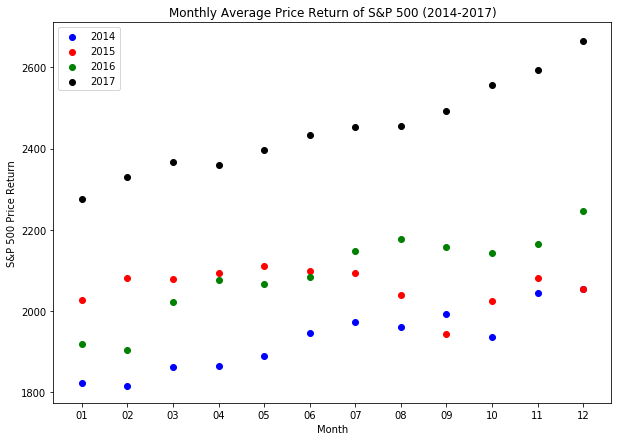

In [530]:
plt.figure(figsize=(10,7))
plt.scatter(months,d14,c='b',label='2014')
plt.scatter(months,d15,c='r', label='2015')
plt.scatter(months,d16,c='g', label='2016')
plt.scatter(months,d17,c='k', label='2017')
plt.legend()
plt.xlabel('Month')
plt.ylabel('S&P 500 Price Return')
plt.title('Monthly Average Price Return of S&P 500 (2014-2017)')
plt.show()

In [531]:
d14[1] = feb14_2.loc['mean','S&P 500'].round(1)

In [532]:
pr['2014-01']

,S&P 500 (TR),S&P 500 (Net TR),S&P 500
date,,,
2014-01-02,3286.69,3020.60,1831.98
2014-01-03,3285.68,3019.65,1831.37
2014-01-06,3277.48,3012.10,1826.77
2014-01-07,3297.45,3030.44,1837.88
2014-01-08,3297.74,3030.43,1837.49
2014-01-09,3298.87,3031.47,1838.13
2014-01-10,3306.49,3038.48,1842.37
2014-01-13,3265.27,3000.50,1819.20
2014-01-14,3300.61,3032.97,1838.88


## Adding Features to data

#### Calclulating Price Return % change from daily, weekly, monthly

% change = (today's price return - tomorrow's price return)/today's price return

In [533]:
pchangeDay = pr['2014':'2018']['S&P 500'].pct_change().round(5)
pchangeWeek = pr['2014':'2018']['S&P 500'].pct_change(7).round(5)
pchangeMonth = pr['2014':'2018']['S&P 500'].pct_change(21).round(5)

In [534]:
#Merge into dataframe
pr_1 = pr.merge(pchangeDay.to_frame(),left_index=True,right_index=True)

In [535]:
pr_1.rename(columns = {'S&P 500_y':'Daily % Change'},inplace=True)
pr_1.rename(columns = {'S&P 500_x':'S&P 500'},inplace=True)
pr_1.head()

,S&P 500 (TR),S&P 500 (Net TR),S&P 500,Daily % Change
date,,,,
2014-01-02,3286.69,3020.60,1831.98,NaN
2014-01-03,3285.68,3019.65,1831.37,-0.00033
2014-01-06,3277.48,3012.10,1826.77,-0.00251
2014-01-07,3297.45,3030.44,1837.88,0.00608
2014-01-08,3297.74,3030.43,1837.49,-0.00021


In [536]:
pr_2 = pr_1.merge(pchangeWeek.to_frame(),left_index=True,right_index=True)

In [537]:
pr_2.rename(columns = {'S&P 500_x':'S&P 500'},inplace=True)
pr_2.rename(columns = {'S&P 500_y':'Weekly % Change'},inplace=True)

In [538]:
pr_3 = pr_2.merge(pchangeMonth.to_frame(),left_index=True,right_index=True)
pr_3.rename(columns = {'S&P 500_x':'S&P 500'},inplace=True)
pr_3.rename(columns = {'S&P 500_y':'Monthly % Change'},inplace=True)
pr_1 = pr_3

#### Calclulating Total Return % change from daily, weekly, monthly

In [539]:
trchangeDay = pr['2014':'2018']['S&P 500 (TR)'].pct_change().round(5)
trchangeWeek = pr['2014':'2018']['S&P 500 (TR)'].pct_change(7).round(5)
trchangeMonth = pr['2014':'2018']['S&P 500 (TR)'].pct_change(21).round(5)

In [540]:
pr_3 = pr_3.merge(trchangeDay.to_frame(),left_index=True,right_index=True)

In [541]:
pr_3.rename(columns = {'S&P 500 (TR)_x':'S&P 500 (TR)'},inplace=True)

In [542]:
pr_3.rename(columns = {'S&P 500 (TR)_y':'TR Daily %'},inplace=True)

In [543]:
pr_3 = pr_3.merge(trchangeWeek.to_frame(),left_index=True,right_index=True)

In [544]:
pr_3.rename(columns = {'S&P 500 (TR)_x':'S&P 500 (TR)'},inplace=True)
pr_3.rename(columns = {'S&P 500 (TR)_y':'TR Weekly %'},inplace=True)

In [545]:
pr_3 = pr_3.merge(trchangeMonth.to_frame(),left_index=True,right_index=True)

In [546]:
pr_3.rename(columns = {'S&P 500 (TR)_x':'S&P 500 (TR)'},inplace=True)
pr_3.rename(columns = {'S&P 500 (TR)_y':'TR Monthly %'},inplace=True)

In [548]:
pr_1 = pr_3